In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import copy
warnings.simplefilter("ignore")
plt.rcParams['font.sans-serif'] = ['SimHei']   
plt.rcParams['axes.unicode_minus'] = False 

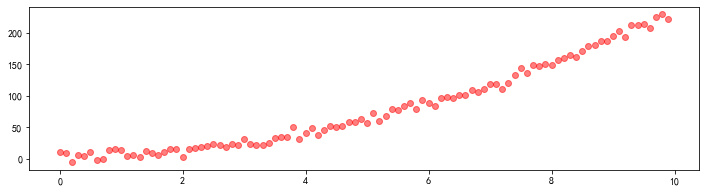

In [2]:
np.random.seed(242231)
x = np.arange(0, 10, 0.1)
y = 3.75 + 2.33 * np.power(x, 2) + np.random.randn(len(x))*5
plt.figure(figsize=(12, 3))
plt.plot(x, y, 'ro', alpha=0.5)
plt.show()

In [3]:
loops = 10000
learning_rate = 0.01

# 普通线性回归  ==========================================
np.random.seed(13013)
w = np.random.randn()
b = np.random.randn()
for i in range(loops):
    y_ = b + w*x
    mse = 0.5 * np.mean(np.power((y-y_), 2))
    dw = -np.mean((y-y_)*x)
    db = -np.mean((y-y_)*1)
    w -= dw*learning_rate # 不设置学习率，结果模型爆炸了
    b -= db*learning_rate

# 加权线性回归  ==========================================
np.random.seed(13013)
w = np.random.randn()
b = np.random.randn()
sw = np.power(x+1, 2)/np.sum(np.power(x+1, 2))
sw = sw/np.sum(sw) # x 越大的样本，权重越大
for i in range(loops):
    y2_ = b + w*x
    mse = 0.5 * np.mean(np.power((y-y2_), 2))
    dw = -np.dot((y-y2_)*x, sw) # 【从np.mean 修改成 np.dot，用加权梯度取代平均梯度】
    db = -np.dot((y-y2_)*1, sw)
    w -= dw*learning_rate # 不设置学习率，结果模型爆炸了
    b -= db*learning_rate

In [4]:
# 局部加权线性回归  ==========================================
def weight_linear_regression(sx, sy, sw, loops, learning_rate):
    np.random.seed(13013)
    w = np.random.randn()
    b = np.random.randn()
    for i in range(loops):
        y_ = b + w*sx
        mse = 0.5 * np.mean(np.power((sy-y_), 2))
        dw = -np.dot((sy-y_)*sx, sw) # 【从np.mean 修改成 np.dot，用加权梯度取代平均梯度】
        db = -np.dot((sy-y_)*1, sw)
        w -= dw*learning_rate # 不设置学习率，结果模型爆炸了
        b -= db*learning_rate
    return w, b

nums = len(x)
windows = 5 # 窗口的数量
shif = windows//2
y3_ = list()
for i in range(nums):
    section = [j-shif+i for j in range(windows) if j-shif+i>=0 and j-shif+i<nums]
    sx = x[section]
    su = np.mean(sx)
    sd = np.std(sx)
    sw = np.exp(-np.power(sx-su, 2)/sd)
    sy = y[section]
    tw, tb = weight_linear_regression(sx, sy, sw, loops=100, learning_rate=0.0005) 
    tx = x[i]
    ty = y[i]
    ty_ = np.dot(tw, tx) + tb
    y3_.append(ty_)

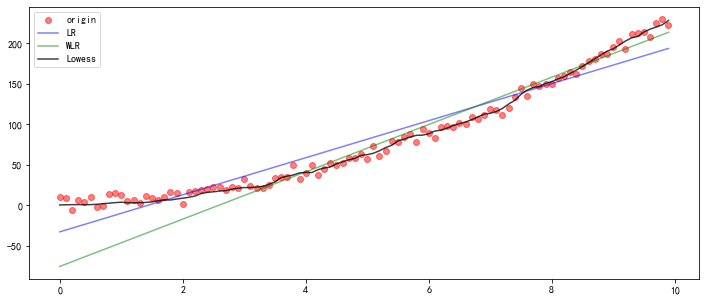

'\n局部加权回归（黑色部分），因为利用到x点前后的信息，赋予了高斯核的权重，效果比LR和WLR都要好\n但是带来的是性能的消耗，基本上每个点都拟合了一个模型\n'

In [5]:
# ==========================================
plt.figure(figsize=(12, 5))
plt.plot(x, y, 'ro', alpha=0.5, label='origin')
plt.plot(x, y_, 'b-', alpha=0.5, label='LR')
plt.plot(x, y2_, 'g-', alpha=0.5, label='WLR')
plt.plot(x, y3_, '-', color="black", alpha=0.75, label='Lowess')
plt.legend()
plt.show()

"""
局部加权回归（黑色部分），因为利用到x点前后的信息，赋予了高斯核的权重，效果比LR和WLR都要好
但是带来的是性能的消耗，基本上每个点都拟合了一个模型
"""